# Latar Belakang dan Identifikasi Masalah
TransJakarta merupakan pionir sistem Bus Rapid Transit (BRT) di kawasan Asia Tenggara dan Selatan. Diluncurkan pada tahun 2004, layanan ini menjadi solusi transportasi massal untuk mendukung mobilitas penduduk di ibukota Indonesia yang padat, Jakarta. Sebagai sistem BRT dengan jalur terpanjang di dunia, TransJakarta membentang sepanjang 251,2 kilometer. Jaringan transportasi ini terdiri dari 13 koridor utama yang dilengkapi dengan 287 halte, menjangkau berbagai area strategis di kota. Dengan infrastruktur yang ekstensif ini, TransJakarta berperan penting dalam mengakomodasi kebutuhan pergerakan penduduk di salah satu kota terpadat di dunia.


# Tujuan Analisa Data
<ul> Meningkatkan profit dan fasilitas transjakarta

# Metode
<li>Mengetahui waktu terpadat (peak hour) pada moda transportasi TransJakarta dan jumlah jam sibuk dan jam tidak sibuk </li>
<li>Mengetahui lokasi terpadat asal dan tujuan berdasarkan data Tap-In dan Tap-Out pengguna TransJakarta</li>
<li>Menganalisa demografi pengguna TransJakarta</li>
<li>Menganalisa penggunaan metode pembayaran</li>

</ul>

# Memasukan Library

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from IPython.display import display
import warnings

warnings.filterwarnings('ignore')

In [44]:
df=pd.read_csv('Transjakarta.csv')
# menampilkan tampilan top 5 keatas dan top 5 kebawah
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


# Menampilkan Dataset

In [45]:
print(f'Jumlah row dan column df yaitu {df.shape}')
print(f'Nama column : {df.columns.tolist()}')


df.info()

Jumlah row dan column df yaitu (37900, 22)
Nama column : ['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex', 'payCardBirthDate', 'corridorID', 'corridorName', 'direction', 'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         379

# Data Preparation

In [46]:
print(f'jumlah data duplikat : ')
df.duplicated().sum()

jumlah data duplikat : 


0

In [47]:
print(f'Menghitung nilai hilang : ')
df.isna().sum()

Menghitung nilai hilang : 


transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [48]:
print(f'Menghitung presentase nilai hilang : ')
pd.DataFrame(df.isna().sum()/df.shape[0]*100, columns=['null_pct']).query('null_pct>0')

Menghitung presentase nilai hilang : 


,null_pct
corridorID,3.316623
corridorName,5.092348
tapInStops,3.200528
tapOutStops,6.039578
tapOutStopsName,3.546174
tapOutStopsLat,3.546174
tapOutStopsLon,3.546174
stopEndSeq,3.546174
tapOutTime,3.546174
payAmount,2.656992


# Data Cleaning

In [49]:
print("Menghitung presentase nilai hilang:\n", df.isnull().sum())

Menghitung presentase nilai hilang:
 transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64


In [50]:

print("Rows where 'tapOutStops' is NaN and their counts:")
tap_out_nan_counts = df[df['tapOutStops'].isna()].groupby(['transID', 'tapInStopsName', 'tapInTime']).size().reset_index(name='counts')
display(tap_out_nan_counts)

print("\nRows where 'corridorName' is NaN and their counts:")
corridor_name_nan_counts = df[df['corridorName'].isna()].groupby(['transID', 'tapInStopsName', 'tapInTime']).size().reset_index(name='counts')
display(corridor_name_nan_counts)

Rows where 'tapOutStops' is NaN and their counts:


,transID,tapInStopsName,tapInTime,counts
0,AACO541N0A39UF,Masjid Jami Al Fallah,2023-04-14 08:15:03,1
1,AAQL764Q0T01QB,Mushola Almujtahida Rorotan,2023-04-25 06:44:55,1
2,AAUQ896J7T61FI,Wisma 77,2023-04-18 19:31:51,1
3,ABAL072A6G10NW,Gatot Subroto Jamsostek Arah Timur,2023-04-04 16:12:59,1
4,ABOC313C2X52OJ,Epiwalk Epicentrum,2023-04-19 11:43:26,1
...,...,...,...,...
2284,ZZGS141H3R00IC,Tip Top Rawamangun,2023-04-20 21:31:46,1
2285,ZZIB755T4L31BB,Warung Jati,2023-04-15 05:04:10,1
2286,ZZPD736R6Y59AR,Roda Mas Baja Intan,2023-04-24 17:26:29,1
2287,ZZPI262X3O14JQ,St. MRT Fatmawati,2023-04-28 18:27:08,1



Rows where 'corridorName' is NaN and their counts:


,transID,tapInStopsName,tapInTime,counts
0,AAEX920K5M81GF,Sbr. Kalibata Square,2023-04-12 16:29:38,1
1,AAGB155U3G40TA,Pademangan 1,2023-04-11 20:07:00,1
2,AAMQ409Y7G10DQ,RSUD Pasar Minggu,2023-04-07 09:12:37,1
3,AAOT965K7E30DG,Flyover Bintaro,2023-04-21 06:22:59,1
4,AAUQ896J7T61FI,Wisma 77,2023-04-18 19:31:51,1
...,...,...,...,...
1925,ZZEZ895U4H16HB,Flyover Pulo Gebang 1,2023-04-20 06:34:24,1
1926,ZZKL899K5I37QL,SPBU Limo Cinere 1,2023-04-06 20:37:18,1
1927,ZZPF927S6P08IL,Sbr. SMPN 232,2023-04-18 21:40:36,1
1928,ZZQZ837B3L95BD,Cibubur Junction,2023-04-25 05:20:17,1


Seperti yang ditunjukkan dalam beberapa fungsi di atas, missing value yang ada dalam kolom '**corridorName**' dan '**tapOutStops**' tersebar ke beberapa kategori values dan tidak berada dalam satu kategori saja (misal hanya berada di transID atau tapInTime saja) sehingga dapat diasumsikan apabila data dihapus maka analisa data tidak terpengaruh, selain juga karena missing value hanya berjumlah 5-6%. Oleh karena itu, kita akan menghapus missing values dengan cara berikut ini.

In [51]:
df = df.dropna(axis=0)
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31730 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           31730 non-null  object 
 1   payCardID         31730 non-null  int64  
 2   payCardBank       31730 non-null  object 
 3   payCardName       31730 non-null  object 
 4   payCardSex        31730 non-null  object 
 5   payCardBirthDate  31730 non-null  int64  
 6   corridorID        31730 non-null  object 
 7   corridorName      31730 non-null  object 
 8   direction         31730 non-null  float64
 9   tapInStops        31730 non-null  object 
 10  tapInStopsName    31730 non-null  object 
 11  tapInStopsLat     31730 non-null  float64
 12  tapInStopsLon     31730 non-null  float64
 13  stopStartSeq      31730 non-null  int64  
 14  tapInTime         31730 non-null  object 
 15  tapOutStops       31730 non-null  object 
 16  tapOutStopsName   31730 non-null  object 
 17

In [53]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

Setelah dilakukan data cleaning, terlihat bahwa total baris yang ada berkurang dari 37900 baris menjadi 31730. Disaat melakukan pengecekan pada dataset, terlihat data type pada tapInTime dan tapOutTime yang masih berupa object, dimana seharusnya data type pada waktu itu adalah datetime. Oleh karena itu, akan dirubah dtype tersebut menjadi datetime secara manual.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31730 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           31730 non-null  object        
 1   payCardID         31730 non-null  int64         
 2   payCardBank       31730 non-null  object        
 3   payCardName       31730 non-null  object        
 4   payCardSex        31730 non-null  object        
 5   payCardBirthDate  31730 non-null  int64         
 6   corridorID        31730 non-null  object        
 7   corridorName      31730 non-null  object        
 8   direction         31730 non-null  float64       
 9   tapInStops        31730 non-null  object        
 10  tapInStopsName    31730 non-null  object        
 11  tapInStopsLat     31730 non-null  float64       
 12  tapInStopsLon     31730 non-null  float64       
 13  stopStartSeq      31730 non-null  int64         
 14  tapInTime         31730 non

In [55]:
feature_info = []
for column in df.columns:
    data_type = df[column].dtype
    missing_values = df[column].isnull().sum()
    unique_values = df[column].nunique()
    unique_sample = df[column].dropna().unique()
    if len(unique_sample) >= 2:
        unique_sample = list(np.random.choice(unique_sample, 2, replace=False))
    else:
        unique_sample = list(unique_sample)
    feature_info.append([column, data_type, missing_values, unique_values, unique_sample])
df_description = pd.DataFrame(feature_info, columns=['Feature', 'DataType', 'MissingValues', 'UniqueValues', 'SampleUniqueValues'])
print(f"Shape of the DataFrame: {df.shape}")
df_description

Shape of the DataFrame: (31730, 22)


,Feature,DataType,MissingValues,UniqueValues,SampleUniqueValues
0,transID,object,0,31730,"[CYHC299E9K50VV, LETT191E5F64HA]"
1,payCardID,int64,0,1924,"[342533380492204, 3536612674069934]"
2,payCardBank,object,0,6,"[bni, online]"
3,payCardName,object,0,1917,"[Kasiyah Budiyanto, Bakiono Situmorang]"
4,payCardSex,object,0,2,"[F, M]"
5,payCardBirthDate,int64,0,66,"[1981, 2002]"
6,corridorID,object,0,216,"[8K, JAK.38]"
7,corridorName,object,0,211,"[Senen - Pulo Gadung via Kelapa Gading, Senen ..."
8,direction,float64,0,2,"[1.0, 0.0]"
9,tapInStops,object,0,2429,"[B05634P, B01768P]"


# Analisa Statistika Deskriptif


In [56]:
#Pengukuran Tendency Sentral /n
#Dilakukan untuk mengetahui mean, median, dan modus dari data numerikal  /n

#Dengan fungsi df.describe langsung dapat diketahui mean, dan median(50%) dari data tersebut
df.describe().T[['mean', '50%']]

,mean,50%
payCardID,420648335773563008.0,3507250769984157.0
payCardBirthDate,1990.210337,1991.0
direction,0.500504,1.0
tapInStopsLat,-6.214794,-6.214145
tapInStopsLon,106.841787,106.8352
stopStartSeq,13.609991,10.0
tapInTime,2023-04-16 07:59:29.082635008,2023-04-16 17:40:38.500000
tapOutStopsLat,-6.214697,-6.214459
tapOutStopsLon,106.841563,106.834892
stopEndSeq,21.301261,18.0


In [57]:
#  Untuk modus dapat diketahui dari berikut:
modus_BirthDate = df['payCardBirthDate'].mode()[0]
modus_direction =df['direction'].mode()[0]
modus_stopStartSeq =df['stopStartSeq'].mode()[0]
modus_payAmount =df['payAmount'].mode()[0]
print('banyaknya modus dari data')
print('-'*50)
print('modus_BirthDate :', modus_BirthDate)
print('modus_direction :', modus_direction)
print('modus_stopStartSeq:', modus_stopStartSeq)
print('modus_payAmount:', modus_payAmount)

banyaknya modus dari data
--------------------------------------------------
modus_BirthDate : 1992
modus_direction : 1.0
modus_stopStartSeq: 0
modus_payAmount: 3500.0


In [58]:
# Pengukuran Variabilitas
# Dilakukan untuk mengetahui range data, standar deviasi, dan IQR dari data numerikal.

#  Untuk range data dapat diketahui sebagai berikut:
range_BirthDate = df['payCardBirthDate'].max()-df['payCardBirthDate'].min()
range_direction =df['direction'].max()-df['direction'].min()
range_stopStartSeq =df['stopStartSeq'].max()-df['stopStartSeq'].min()
range_payAmount =df['payAmount'].max()-df['payAmount'].min()
print('banyaknya range dari data')
print('-'*50)
print('range_BirthDate :', range_BirthDate)
print('range_direction :', range_direction)
print('range_stopStartSeq:', range_stopStartSeq)
print('range_payAmount:', range_payAmount)

banyaknya range dari data
--------------------------------------------------
range_BirthDate : 66
range_direction : 1.0
range_stopStartSeq: 68
range_payAmount: 20000.0


In [59]:
# Dengan fungsi df.describe langsung dapat diketahui standar deviasinya sebagai berikut:

df.describe().T[['std']]

,std
payCardID,1316423841084310016.0
payCardBirthDate,13.049288
direction,0.500008
tapInStopsLat,0.058456
tapInStopsLon,0.061086
stopStartSeq,12.267099
tapInTime,NaN
tapOutStopsLat,0.059616
tapOutStopsLon,0.061802
stopEndSeq,13.891748


In [60]:
#  Untuk IQR DataFrame dapat diketahui dengan cara berikut:
IQR_BirthDate = df.describe()['payCardBirthDate']['75%']-df.describe()['payCardBirthDate']['25%']
IQR_direction =df.describe()['direction']['75%']-df.describe()['direction']['25%']
IQR_stopStartSeq =df.describe()['stopStartSeq']['75%']-df.describe()['stopStartSeq']['25%']
IQR_payAmount =df.describe()['payAmount']['75%']-df.describe()['payAmount']['25%']
print('Besarnya IQR dari data')
print('-'*50)
print('IQR_BirthDate :', IQR_BirthDate)
print('IQR_direction :', IQR_direction)
print('IQR_stopStartSeq:', IQR_stopStartSeq)
print('IQR_payAmount:', IQR_payAmount)

Besarnya IQR dari data
--------------------------------------------------
IQR_BirthDate : 19.0
IQR_direction : 1.0
IQR_stopStartSeq: 15.0
IQR_payAmount: 3500.0


# Analisa Statistika Deskriptif untuk Data Kategorikal  
  
  Dilakukan untuk mengetahui count,unique,top, dan freq dari data

In [61]:
df.describe(include='O')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapOutStops,tapOutStopsName
count,31730,31730,31730,31730,31730,31730,31730,31730,31730,31730
unique,31730,6,1917,2,216,211,2429,2428,2137,2136
top,EIIW227B8L34VB,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,P00016,BKN
freq,1,15702,71,16939,362,362,208,208,274,274


# Analisa Data

In [62]:
dfs = df.copy()
dfs

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


# Memaksimalkan Layanan Perjalanan

**1. Menganalisa Koridor atau Rute Perjalanan**

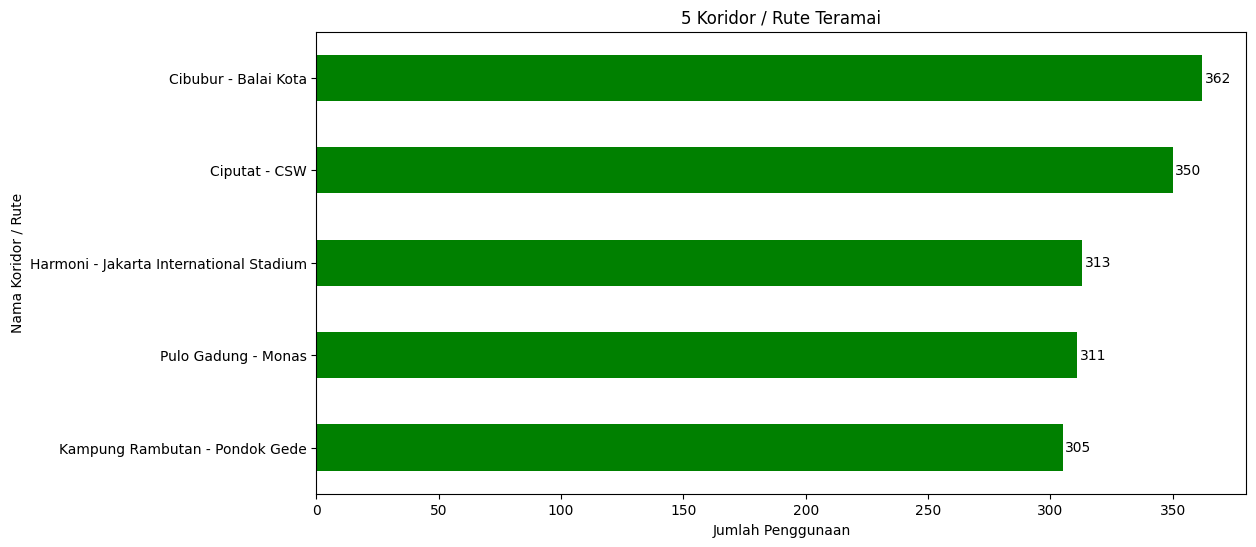

In [63]:
top_koridor = dfs['corridorName'].value_counts().head(5)
top_koridor = top_koridor.sort_values(ascending=True)

plt.figure(figsize=(12, 6))

ax = top_koridor.plot(kind='barh', color='green')
plt.xlabel('Jumlah Penggunaan')
plt.ylabel('Nama Koridor / Rute')
plt.title('5 Koridor / Rute Teramai')

for i, v in enumerate(top_koridor):
    ax.text(v + 1, i, str(v), va='center', fontsize=10, color='black')

plt.show()

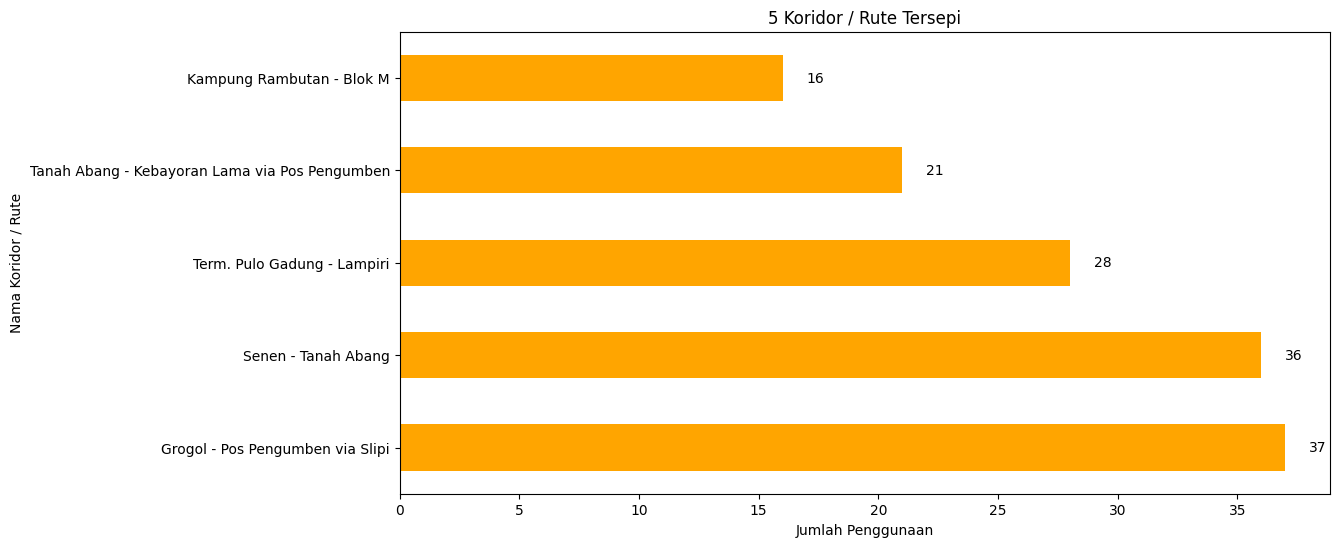

In [64]:
rare_koridor = dfs['corridorName'].value_counts().tail(5)
rare_koridor = rare_koridor.sort_values(ascending=False)

plt.figure(figsize=(12, 6))

ax = rare_koridor.plot(kind='barh', color='orange')
plt.xlabel('Jumlah Penggunaan')
plt.ylabel('Nama Koridor / Rute')
plt.title('5 Koridor / Rute Tersepi')

for i, v in enumerate(rare_koridor):
    ax.text(v + 1, i, str(v), va='center', fontsize=10, color='black')

plt.show()

**2. Analisa jumlah perjalanan sibuk**

**a. analisa hari sibuk**

In [65]:
dfs['tapInTime'] = pd.to_datetime(dfs['tapInTime'])

days_mapping = {
    'Monday': 'Senin',
    'Tuesday': 'Selasa',
    'Wednesday': 'Rabu',
    'Thursday': 'Kamis',
    'Friday': 'Jumat',
    'Saturday': 'Sabtu',
    'Sunday': 'Minggu'
}

# Ekstrak nama hari dari kolom tapInTime dalam bahasa Inggris
dfs['tapDay'] = dfs['tapInTime'].dt.day_name()

# Ganti nama hari dengan bahasa Indonesia
dfs['tapDay'] = dfs['tapDay'].map(days_mapping)

# Tampilkan beberapa baris pertama untuk memverifikasi kolom baru
dfs.head()


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapDay
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Senin
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Senin
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Senin
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Senin
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Senin


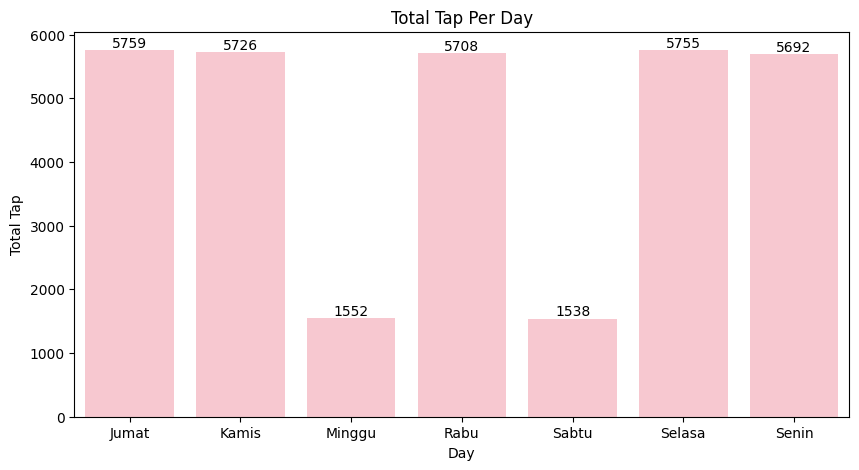

In [66]:

# Menghitung jumlah tap per hari
tap_Per_Day = dfs['tapDay'].value_counts().reset_index()
tap_Per_Day.columns = ['tapDay', 'count']
tap_Per_Day = tap_Per_Day.sort_values('tapDay')

# Membuat bar plot
plt.figure(figsize=(10, 5))
bars = sns.barplot(x=tap_Per_Day['tapDay'], y=tap_Per_Day['count'], color='pink')
plt.title('Total Tap Per Day')
plt.xlabel('Day')
plt.ylabel('Total Tap')

# Menambahkan label pada bar
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

plt.show()


**b. Analisa jam sibuk**

In [67]:

dfs['tapInTime'] = pd.to_datetime(dfs['tapInTime'])
dfs['tapOutTime'] = pd.to_datetime(dfs['tapOutTime'])

dfs['tapInHour'] = dfs['tapInTime'].dt.hour
dfs['tapOutHour'] = dfs['tapOutTime'].dt.hour


dfs['weekday'] = dfs['tapInTime'].dt.weekday

dfs['travelDuration'] = (dfs['tapOutTime'] - dfs['tapInTime']).dt.total_seconds() / 60

In [68]:

def countTripsByHour(data, column):
    return data[column].value_counts().sort_index()

In [69]:

tap_in_counts = countTripsByHour(dfs, 'tapInHour')
tap_out_counts = countTripsByHour(dfs, 'tapOutHour')


In [70]:

total_counts = tap_in_counts.add(tap_out_counts, fill_value=0)


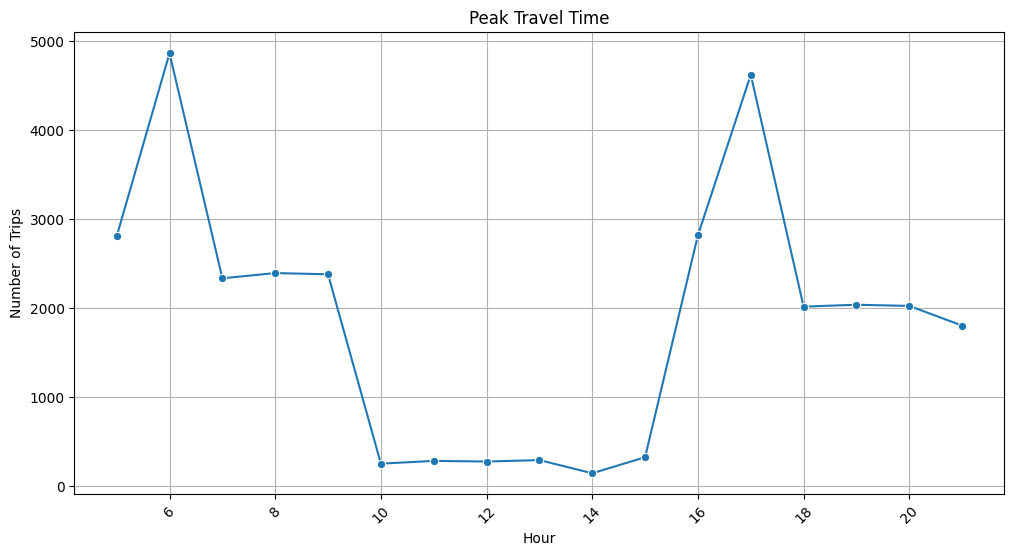

In [71]:
def plotPeakHours(data):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=data.index, y=data.values, marker='o', linestyle='-')
    plt.title('Peak Travel Time')
    plt.xlabel('Hour')
    plt.ylabel('Number of Trips')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
dfs['tapHour'] = dfs['tapInTime'].dt.hour
total_counts = dfs['tapHour'].value_counts().sort_index()

plotPeakHours(total_counts)

In [72]:

peak_hours = [5, 6, 7, 8, 9, 10, 17, 18, 19, 20, 22]
off_peak_hours = [11, 12, 13, 14, 15, 23]


peak_trips = dfs[dfs['tapInHour'].isin(peak_hours) | dfs['tapOutHour'].isin(peak_hours)]
num_peak_trips = peak_trips.shape[0]


off_peak_trips = dfs[dfs['tapInHour'].isin(off_peak_hours) | dfs['tapOutHour'].isin(off_peak_hours)]
num_off_peak_trips = off_peak_trips.shape[0]

print(f"Jumlah perjalanan pada jam sibuk: {num_peak_trips}")
print(f"Jumlah perjalanan pada jam tidak sibuk: {num_off_peak_trips}")

Jumlah perjalanan pada jam sibuk: 29661
Jumlah perjalanan pada jam tidak sibuk: 3038


**d. Analisa demografi pengguna setiap mode transportasi**

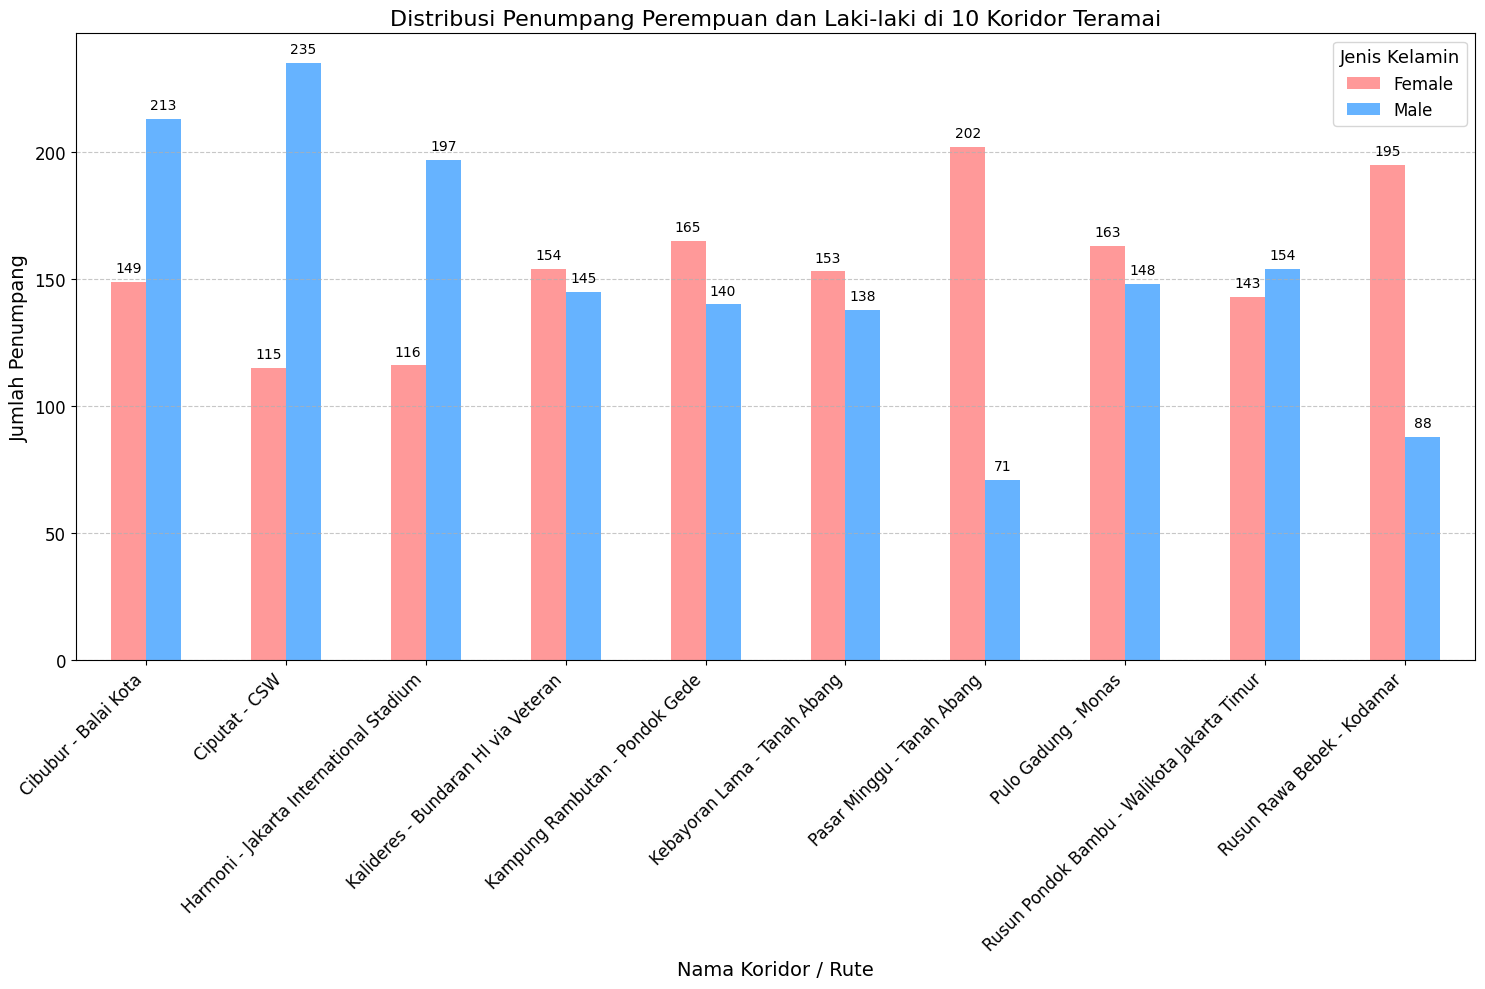

In [73]:
# Analyze the female and male distribution in the top 5 corridors
top_koridor = dfs['corridorName'].value_counts().head(10)
top_koridor = top_koridor.sort_values(ascending=True)
top_koridor_names = top_koridor.index.tolist()
top_koridor_data = dfs[dfs['corridorName'].isin(top_koridor_names)]

gender_counts_top_koridor = top_koridor_data.groupby(['corridorName', 'payCardSex']).size().unstack(fill_value=0)
gender_counts_top_koridor.columns = ['Female', 'Male']

fig, ax = plt.subplots(figsize=(15, 10))
gender_counts_top_koridor.plot(kind='bar', ax=ax, color=['#ff9999','#66b3ff'])

plt.title('Distribusi Penumpang Perempuan dan Laki-laki di 10 Koridor Teramai', fontsize=16)
plt.xlabel('Nama Koridor / Rute', fontsize=14)
plt.ylabel('Jumlah Penumpang', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x labels for better readability
plt.yticks(fontsize=12)

plt.legend(title='Jenis Kelamin', title_fontsize='13', fontsize='12')

plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()


plt.show()


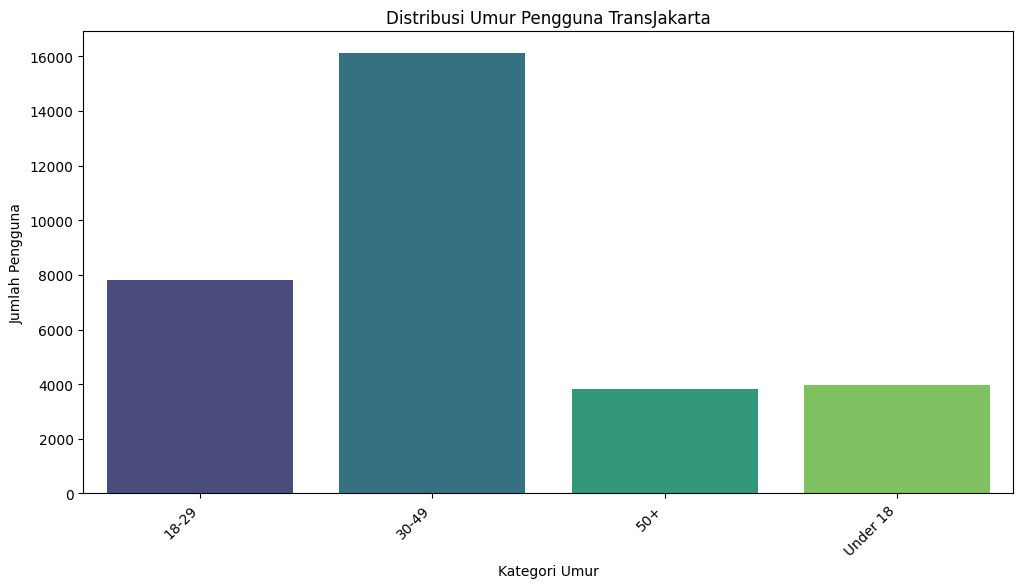

In [74]:
current_year = 2024
dfs['age'] = current_year - dfs['payCardBirthDate']

# Define age categories
def age_category(age):
    if age < 18:
        return 'Under 18'
    elif 18 <= age < 30:
        return '18-29'
    elif 30 <= age < 50:
        return '30-49'
    else:
        return '50+'

dfs['ageCategory'] = dfs['age'].apply(age_category)

# Count the number of users in each age category
age_category_counts = dfs['ageCategory'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=age_category_counts.index, y=age_category_counts.values, palette='viridis')
plt.title('Distribusi Umur Pengguna TransJakarta')
plt.xlabel('Kategori Umur')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45, ha='right')
plt.show()

**Masukan untuk memaksimalkan layanan perjalanan**

1. Dengan melihat dari koridor yang padat, hari-hari sibuk, dan jam sibuk kita dapat mengalihkan bus dari rute yang sepi ke jam-jam tertentu dan hari-hari tertentu sesuai dengan keperluan
2. Menambah bus khusus wanita untuk koridor dengan penumpang perempuan terbanyak
3. Memberikan kursi khusus kepada kategori umu 50+

# Memaksimalkan Layanan Pembayaran 

**a. Menganalisa jumlah tapIn dan tapOut pada setiap halte TransJakarta**

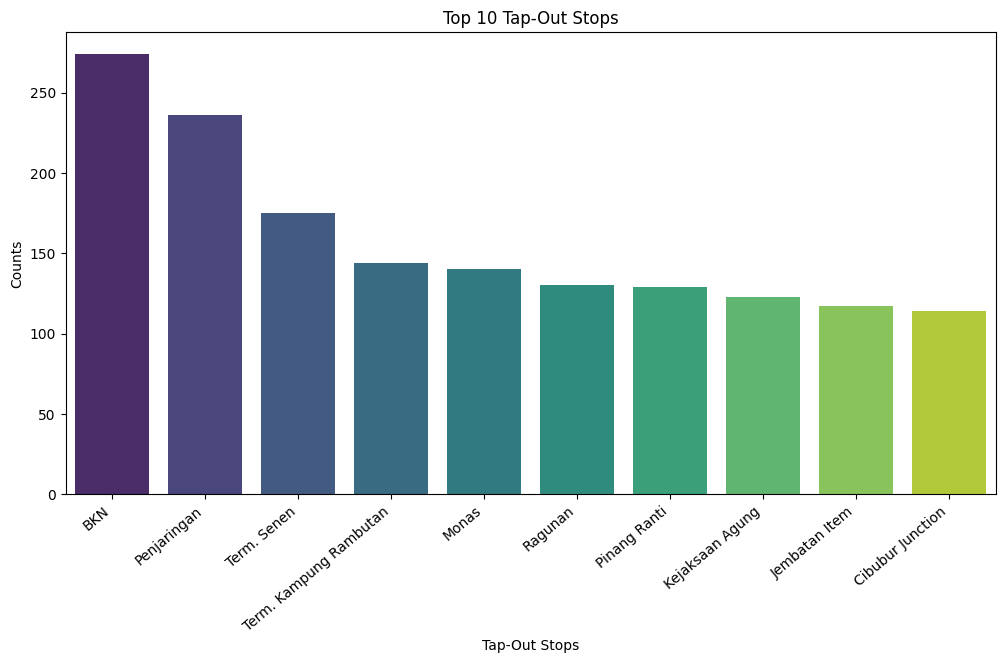

In [75]:
tap_out_counts = df.groupby(['tapOutStopsName', 'tapOutStops']).size().reset_index(name='counts')
top_tap_out = tap_out_counts.nlargest(10, 'counts')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_tap_out, x='tapOutStopsName', y='counts', palette='viridis')
plt.xticks(rotation=40, ha='right')
plt.title('Top 10 Tap-Out Stops')
plt.xlabel('Tap-Out Stops')
plt.ylabel('Counts')
plt.show()

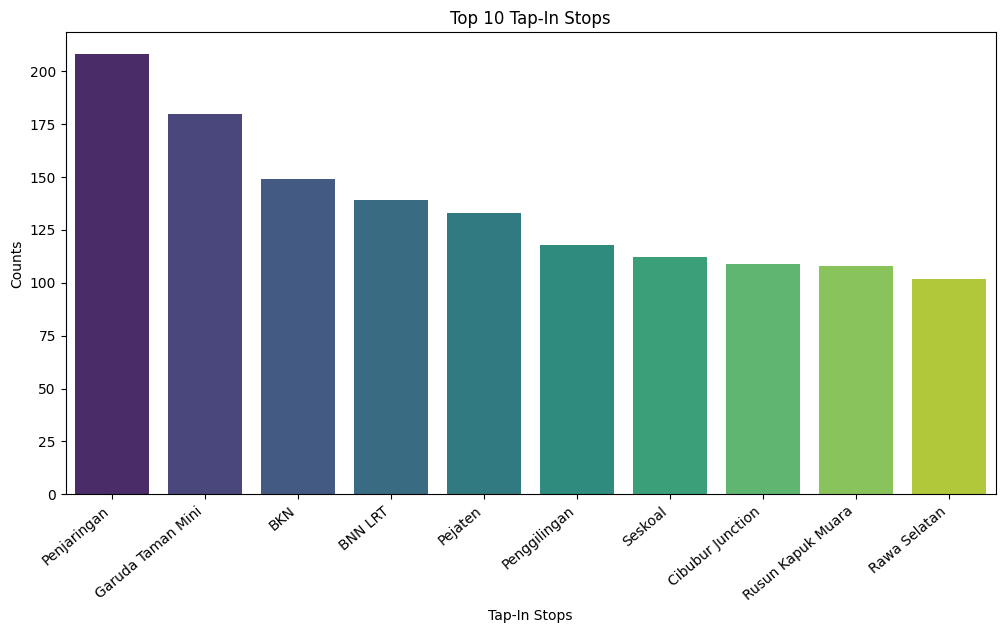

In [76]:
tap_in_counts = df.groupby(['tapInStopsName', 'tapInStops']).size().reset_index(name='counts')
top_tap_in = tap_in_counts.nlargest(10, 'counts')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_tap_in, x='tapInStopsName', y='counts', palette='viridis')
plt.xticks(rotation=40, ha='right')
plt.title('Top 10 Tap-In Stops')
plt.xlabel('Tap-In Stops')
plt.ylabel('Counts')
plt.show()

**b. Analisa metode pembayaran setiap moda transportasi dan umur pengguna**

In [77]:
unique_pay_amounts = df['payAmount'].unique()
print("Nilai payAmount yang ada di data tersebut:")
print(unique_pay_amounts)

Nilai payAmount yang ada di data tersebut:
[ 3500. 20000.     0.]


In [78]:
transjakarta_data = df[df['payAmount'] == 3500]

total_revenue = transjakarta_data['payAmount'].sum()
print(f"Total Revenue: {total_revenue}")


Total Revenue: 55699000.0


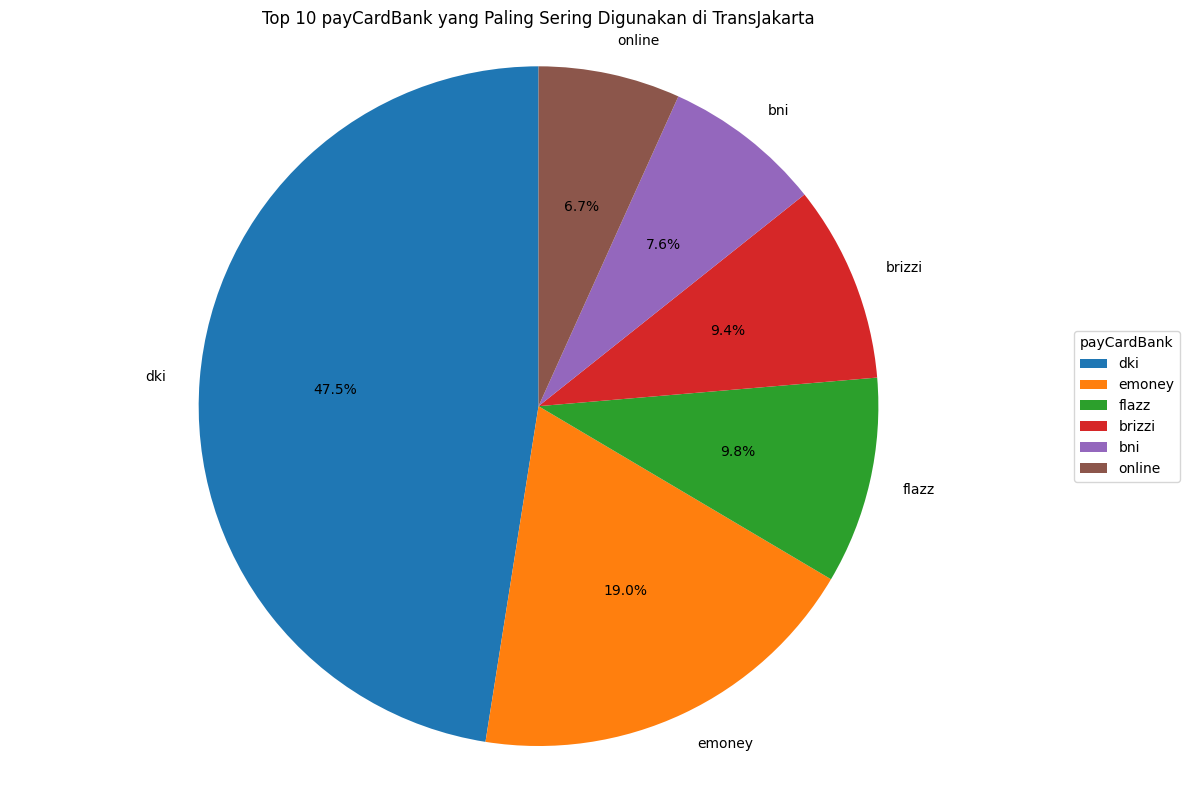

In [79]:
payCardBank_counts = transjakarta_data['payCardBank'].value_counts()

top_payCardBank = payCardBank_counts.nlargest(10)

plt.figure(figsize=(12, 8))
plt.pie(top_payCardBank.values, labels=top_payCardBank.index, autopct='%1.1f%%', startangle=90)

plt.title('Top 10 payCardBank yang Paling Sering Digunakan di TransJakarta')

plt.legend(title="payCardBank", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')

plt.tight_layout()
plt.show()

In [80]:
JakLingko_data = df[df['payAmount'] == 0]

total_revenue = JakLingko_data['payAmount'].sum()
print(f"Total Revenue: {total_revenue}")


Total Revenue: 0.0


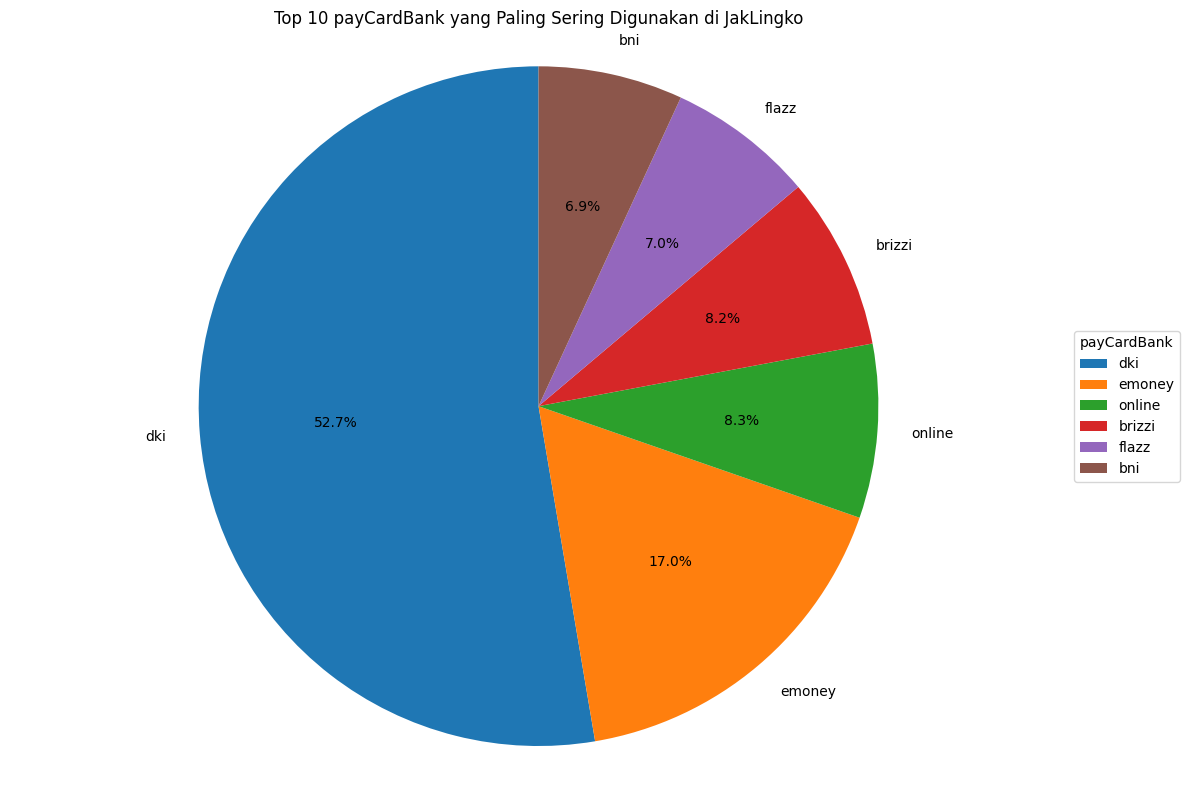

In [81]:

payCardBank_counts = JakLingko_data['payCardBank'].value_counts()

top_payCardBank = payCardBank_counts.nlargest(10)

plt.figure(figsize=(12, 8))
plt.pie(top_payCardBank.values, labels=top_payCardBank.index, autopct='%1.1f%%', startangle=90)

plt.title('Top 10 payCardBank yang Paling Sering Digunakan di JakLingko')

plt.legend(title="payCardBank", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')

plt.tight_layout()
plt.show()

In [82]:
RoyalTrans_data = df[df['payAmount'] == 20000]

total_revenue = RoyalTrans_data['payAmount'].sum()
print(f"Total Revenue: {total_revenue}")

Total Revenue: 30660000.0


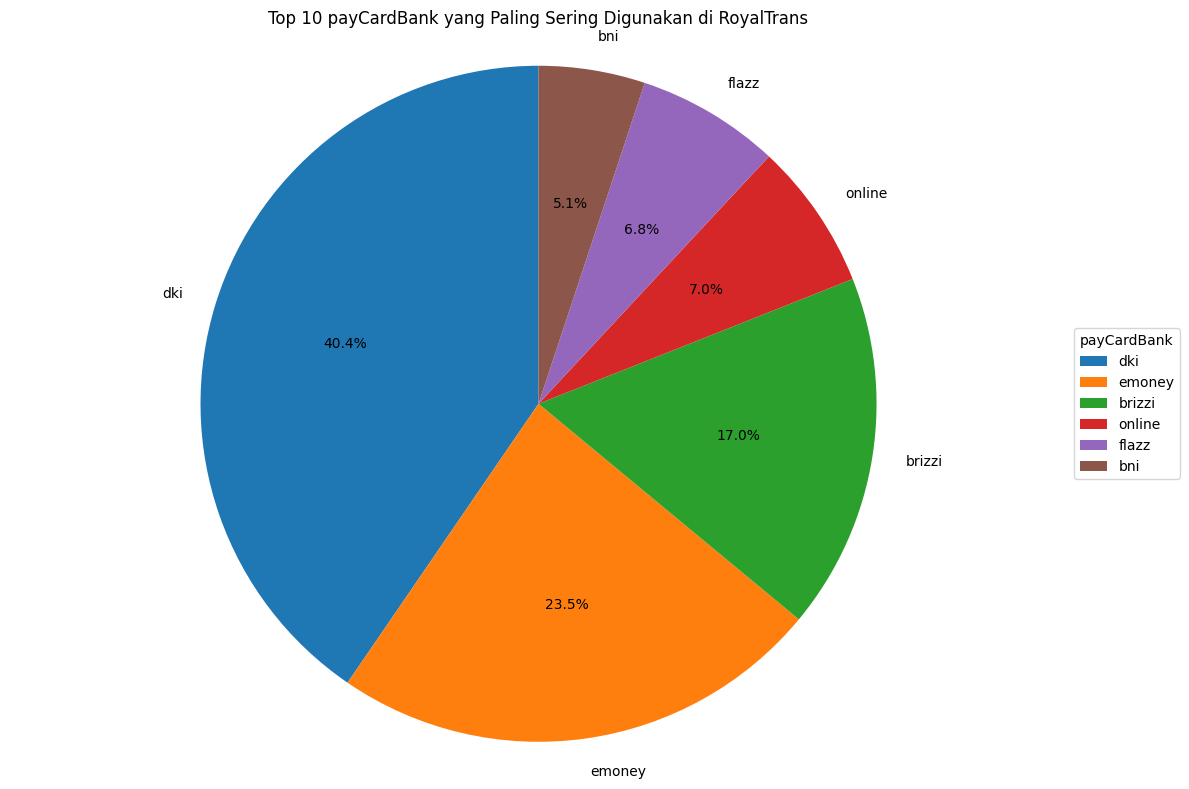

In [83]:

payCardBank_counts = RoyalTrans_data['payCardBank'].value_counts()

top_payCardBank = payCardBank_counts.nlargest(10)

plt.figure(figsize=(12, 8))
plt.pie(top_payCardBank.values, labels=top_payCardBank.index, autopct='%1.1f%%', startangle=90)

plt.title('Top 10 payCardBank yang Paling Sering Digunakan di RoyalTrans')

plt.legend(title="payCardBank", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')

plt.tight_layout()
plt.show()

**Masukkan untuk memaksimalkan layanan pembayaran**

1. Dari jumlah tap in dan tap out kita dapat memberikan fasilitas untuk pengisian kartu pembayaran bekerjasama dengan bank-bank terkait
2. Pada setiap moda transportasi penggunaan kartu DKI dan e-money cukup tinggi. Guna memfasilitasi pengguna kita dapat memberikan cashback pada e-money dan brizzi guna meningkatkan kemudahan transaksi

# Analisa untuk menambah pendapatan

**a. Analisa demografi pengguna**

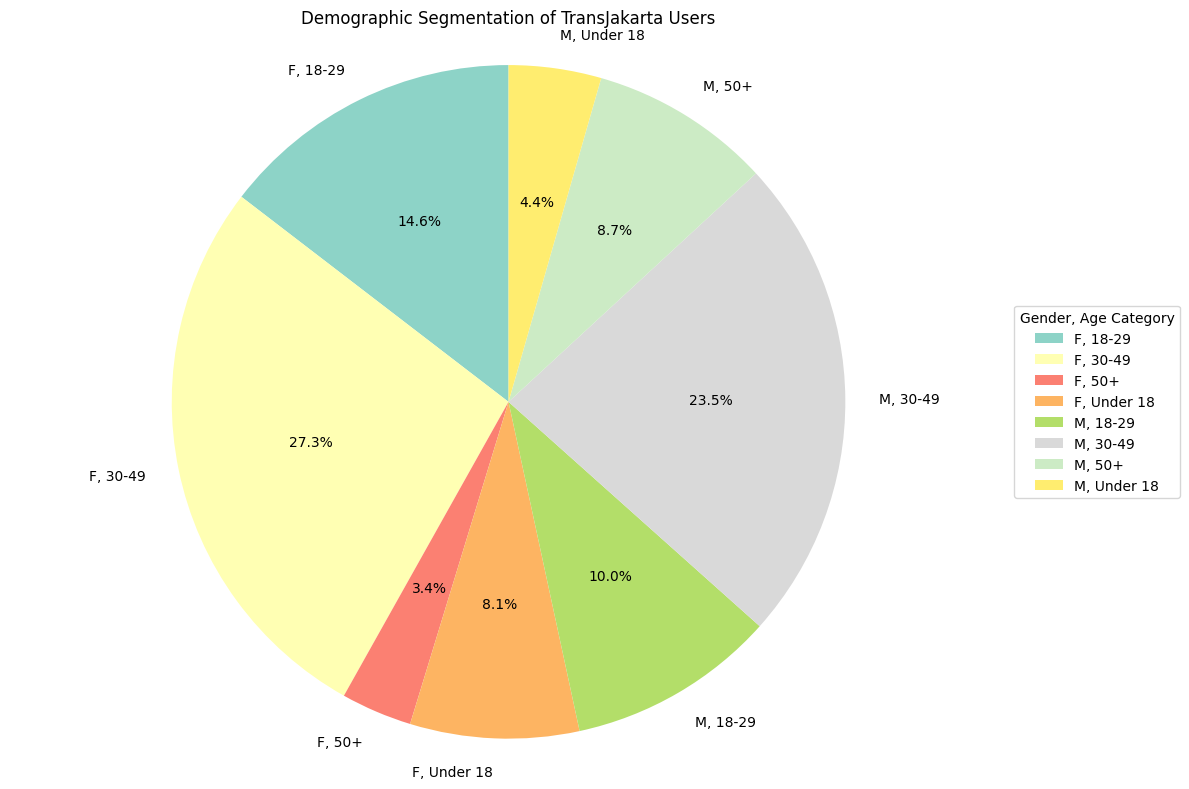

In [84]:

dfs['tapInTime'] = pd.to_datetime(dfs['tapInTime'])
dfs['tapOutTime'] = pd.to_datetime(dfs['tapOutTime'])

df['payAmount'] = pd.to_numeric(df['payAmount'], errors='coerce')

def classify_service(payAmount):
    if payAmount == 3500:
        return 'TransJakarta'
    elif payAmount == 20000:
        return 'Royal Trans'
    elif payAmount == 0:
        return 'JakLingko'
    else:
        return 'Unknown'

dfs['serviceType'] = dfs['payAmount'].apply(classify_service)

current_year = pd.to_datetime('now').year
dfs['age'] = current_year - dfs['payCardBirthDate']

def age_category(age):
    if age < 18:
        return 'Under 18'
    elif 18 <= age < 30:
        return '18-29'
    elif 30 <= age < 50:
        return '30-49'
    else:
        return '50+'

dfs['ageCategory'] = dfs['age'].apply(age_category)


demographic_segments = dfs.groupby(['payCardSex', 'ageCategory']).size().reset_index(name='count')


plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(demographic_segments)))

plt.pie(demographic_segments['count'],
        labels=[f"{sex}, {age}" for sex, age in zip(demographic_segments['payCardSex'], demographic_segments['ageCategory'])],
        autopct='%1.1f%%',
        colors=colors,
        startangle=90)

plt.title('Demographic Segmentation of TransJakarta Users')
plt.axis('equal')
plt.legend(title="Gender, Age Category", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

**b. Analisa pendapatan berdasarkan kelompok umur**

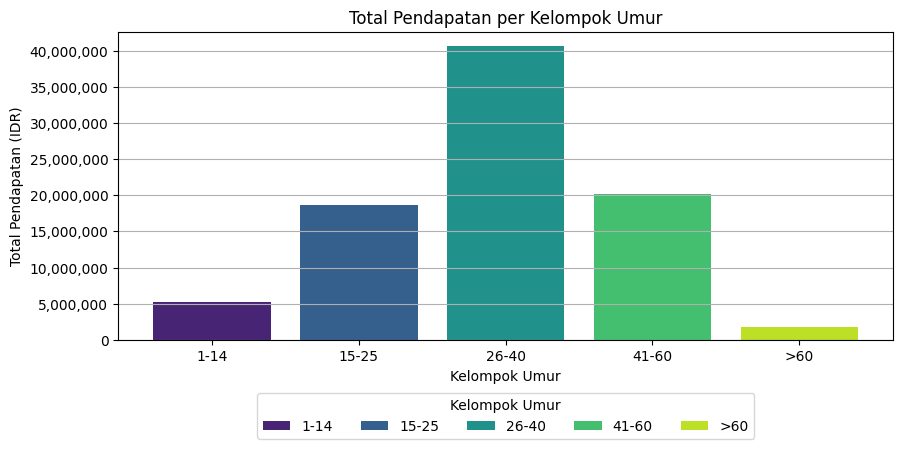

In [85]:
import matplotlib.ticker as ticker
bins = [1, 14, 25, 40, 60, 100]
labels = ['1-14', '15-25', '26-40', '41-60', '>60']

dfs['ageGroup'] = pd.cut(dfs['age'], bins=bins, labels=labels, right=False)

age_group_revenue = dfs.groupby('ageGroup')['payAmount'].sum().reset_index()

age_group_revenue.columns = ['Age Group', 'Total Revenue']
age_group_revenue

age_group_revenue.columns = ['Age Group', 'Total Revenue']

plt.figure(figsize=(10, 4))
colors = plt.cm.viridis([0.1, 0.3, 0.5, 0.7, 0.9, 1.0])
bars = plt.bar(age_group_revenue['Age Group'], age_group_revenue['Total Revenue'], color= colors)
plt.xlabel('Kelompok Umur')
plt.ylabel('Total Pendapatan (IDR)')
plt.title('Total Pendapatan per Kelompok Umur')
plt.grid(axis='y')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.legend(bars, age_group_revenue['Age Group'], title="Kelompok Umur",  bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)

plt.show()

**Masukkan untuk peningkatan pendapatan**
1. Melihat dari demografi pengguna dan kelompok umur kita dapat mengiklan kan produk sesuai dengan gender beserta umur. Kita dapat menyasar kelompok umur 26-40 dengan sasaran wanita
2. Dapat mengiklankan produk-produk pada rute-rute padat